<a href="https://www.kaggle.com/lalina/starbucks-survey-analysis-using-chi-square-test?scriptVersionId=87772237" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Starbucks Survey Analysis Using Chi Square Test

I will continue my [The 5-Day Data Challenge](https://www.kaggle.com/rtatman/the-5-day-data-challenge#Table-of-Contents) this time. Previously, I have finished the [day 1 to day 3](https://www.kaggle.com/lalina/data-challenge-day-1-of-5) in which I did some simple data cleaning and statistical t-test, and [day 4](https://www.kaggle.com/lalina/data-challenge-day-2-of-5) in which I created data visualization for categorical data. 

Moving to challenge day 5, I will conduct a chi square test of two variables collected from survey. I will use a dataset of [Starbucks Survey](https://www.kaggle.com/huyhuy12340/starbucks-cleaning-and-manipulation/data?select=starbucks-customer-survey-final.csv) which has been cleaned and manipulated. 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
path = "../input/starbucks-cleaning-and-manipulation/starbucks-customer-survey-final.csv"
df = pd.read_csv(path)
df.head()

,id,gender,age,status,income,visitNo,method,timeSpend,location,membershipCard,...,promoMethod_0,promoMethod_1,promoMethod_2,promoMethod_3,promoMethod_4,promoMethod_5,promoMethod_6,promoMethod_7,promoMethod_8,loyal
0,0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Yes,No,No,Yes,No,No,No,Yes,Yes,Yes
1,1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,No,Yes,No,Yes,No,No,No,No,No,Yes
2,2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,No,Yes,No,No,Yes,No,No,No,No,Yes
3,3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,No,No,No,No,No,Yes,No,No,No,No
4,4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,No,No,No,Yes,No,No,No,Yes,No,Yes


In [3]:
df.shape

(122, 36)

In [4]:
df.shape

(122, 36)

In [5]:
df.columns

Index(['id', 'gender', 'age', 'status', 'income', 'visitNo', 'method',
       'timeSpend', 'location', 'membershipCard', 'itemPurchase_0',
       'itemPurchase_1', 'itemPurchase_2', 'itemPurchase_3', 'itemPurchase_4',
       'itemPurchase_5', 'itemPurchase_6', 'itemPurchase_7', 'spendPurchase',
       'productRate', 'priceRate', 'promoRate', 'ambianceRate', 'wifiRate',
       'serviceRate', 'chooseRate', 'promoMethod_0', 'promoMethod_1',
       'promoMethod_2', 'promoMethod_3', 'promoMethod_4', 'promoMethod_5',
       'promoMethod_6', 'promoMethod_7', 'promoMethod_8', 'loyal'],
      dtype='object')

<a id="#subsection-one"></a>
## 1. Hypothesis testing process (using manual calculation)

* **Question** : Is there any association between gender and membership preferences?
* **H0** : There is no association between gender and member ownership.
* **Significance level** : 0.05
* **Confidence Interval** : 95%


In [6]:
dx = df[['gender','membershipCard']]

In [7]:
dx.head()

,gender,membershipCard
0,Female,Yes
1,Female,Yes
2,Male,Yes
3,Female,No
4,Male,No


In [8]:
mc_tab = pd.crosstab(df.gender, df.membershipCard, margins = True)
mc_tab.columns = ["no", "yes", "row_totals"]
mc_tab.index = ["female", "make","col_totals"]
mc_tab

,no,yes,row_totals
female,35,30,65
make,27,30,57
col_totals,62,60,122


In [9]:
#observed table
observed = mc_tab.iloc[0:2,0:2]
observed

,no,yes
female,35,30
make,27,30


**Formula to find expected table :**

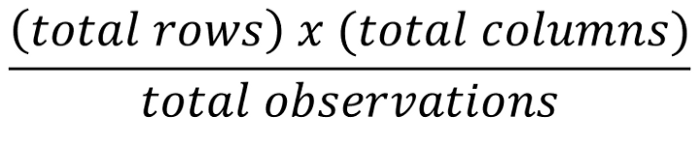

* total_rows = mc_tab[“row_totals”]
* total_columns = mc_tab.loc[“col_totals”]
* total_observations = 122

In [10]:
# Define the rows, columns and total observations
total_rows = mc_tab['row_totals'][0:2]
total_columns = mc_tab.loc['col_totals'][0:2]
total_observations = 122
expected = np.outer(total_rows, total_columns) / total_observations

In [11]:
# Expected table
expected = pd.DataFrame(expected)
expected.columns = ["no", "yes"]
expected.index = ["female", "male"]

# You can check the data of expected table by calling it
expected

,no,yes
female,33.032787,31.967213
male,28.967213,28.032787


**Formula to find the chi square value :**

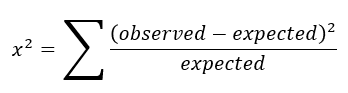

In [12]:
chi_squared_stat = ((observed - expected)**2/expected).sum().sum()
chi_squared_stat

0.23821339950372175

**Formula degree of freedom = (total rows — 1) x (total columns — 1)**

degree of freedom = (2-1) x (2-1) = 1

In [13]:
# Find the critical value (you can also use chi table)
critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(critical_value)

3.841458820694124


chi_squared_stat < critical value

0.239 < 3.841

**Conclusion** = Accept the null hypothesis. In other words, there is no significant association between gender type and membership status.

<a id="#subsection-two"></a>

## 2. Hypothesis testing process (using stats.chi2_contingency)
* **Question** : Is there any association between status and membership preferences?
* **H0** : There is no association between status and member ownership.
* **Significance level** : 0.05
* **Confidence Interval** : 95%
​

In [14]:
dz = df[['status', 'membershipCard']]
dz.head()

,status,membershipCard
0,Student,Yes
1,Student,Yes
2,Employed,Yes
3,Student,No
4,Student,No


In [15]:
dz.status.unique()

array(['Student', 'Employed', 'Self-employed', 'Housewife'], dtype=object)

In [16]:
status_tab = pd.crosstab(df.status, df.membershipCard, margins = True)
status_tab.columns = ["no", "yes", "row_totals"]
status_tab.index = ["student", "employed","self-employed","housewife","col_totals"]
status_tab

,no,yes,row_totals
student,24,37,61
employed,1,1,2
self-employed,7,10,17
housewife,30,12,42
col_totals,62,60,122


In [17]:
# Create observation table
observed_status = status_tab.iloc[0:5, 0:2]
observed_status

,no,yes
student,24,37
employed,1,1
self-employed,7,10
housewife,30,12
col_totals,62,60


stats.chi2_contingency will result in 4 values : 

chi_squared_stat(x2), p_value, degree of freedom, and expected_crosstab

In [18]:
chi2, pvalue, dof, expected = stats.chi2_contingency(observed_status)
print(chi2, pvalue, dof)
print(expected)

10.984354386916054 0.026740413330191903 4
[[31.         30.        ]
 [ 1.01639344  0.98360656]
 [ 8.63934426  8.36065574]
 [21.3442623  20.6557377 ]
 [62.         60.        ]]


p_value < significance value

0.027 < 0.05

**Conclusion** = Reject the null hypothesis. In other words, there is probable association between employment status and member ownership.

Reading list :
* https://www.kaggle.com/huyhuy12340/starbucks-cleaning-and-manipulation/data?select=starbucks-customer-survey-final.csv
* https://medium.com/@nhan.tran/the-chi-square-statistic-p-2-92ed4bcefd3
* https://medium.com/@nhan.tran/the-chi-square-statistic-p3-programming-with-python-87eb079f36af